<a href="https://colab.research.google.com/github/brandim04/CienciaDeDados/blob/main/U2A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/4° período/Ciência de Dados/'

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/4° período /Ciência de Dados /funcionarios_empresa.csv')

Análise exploratória e inicial

In [5]:
# Exibindo as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print("Informações gerais do dataset:")
print(df.info())

print("\n" + "="*50)
print("Dimensões do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Primeiras 5 linhas do dataset:
   ID_Funcionario                Nome  Idade Departamento  \
0               1  Tatiane Mendes 001     40       Vendas   
1               2       Ana Silva 002     23    Marketing   
2               3    Rafael Alves 003     36           TI   
3               4     Carla Souza 004     32    Operações   
4               5     Pedro Costa 005     33   Financeiro   

                      Cargo  Salario  Tempo_Empresa_Meses Data_Admissao  \
0               Vendedor Jr  3685.36                    4    2025-05-18   
1  Coordenador de Marketing  8081.03                    1    2025-08-16   
2       Desenvolvedor Pleno  8491.98                    2    2025-07-17   
3      Gerente de Operações  9745.30                    9    2024-12-19   
4    Analista Financeiro Jr  3556.68                   63    2020-07-13   

      Nivel_Educacao Estado_Civil Tipo_Contrato  Avaliacao_Performance  \
0  Superior Completo    Casado(a)           CLT                    4.8   
1  

In [6]:
print("Estatísticas descritivas para variáveis numéricas:")
print(df.describe())

print("\n" + "="*50)
print("Estatísticas descritivas para variáveis categóricas:")
print(df.describe(include=['object']))

Estatísticas descritivas para variáveis numéricas:
       ID_Funcionario       Idade       Salario  Tempo_Empresa_Meses  \
count      500.000000  500.000000    500.000000            500.00000   
mean       250.500000   35.764000   7780.120720             21.79600   
std        144.481833    9.610673   4108.494711             22.63234   
min          1.000000   19.000000   1170.990000              1.00000   
25%        125.750000   29.000000   4446.787500              5.00000   
50%        250.500000   35.000000   7167.265000             14.00000   
75%        375.250000   41.000000   9846.422500             30.00000   
max        500.000000   67.000000  37988.030000            120.00000   

       Avaliacao_Performance  Horas_Extras_Mes   Beneficios  \
count             475.000000        500.000000   490.000000   
mean                3.427368         10.370000   811.200224   
std                 0.765589         11.298159   210.466584   
min                 1.000000          0.000000  

In [7]:
df.dtypes

,0
ID_Funcionario,int64
Nome,object
Idade,int64
Departamento,object
Cargo,object
Salario,float64
Tempo_Empresa_Meses,int64
Data_Admissao,object
Nivel_Educacao,object
Estado_Civil,object


Identificação e tratamento de valores nulos

In [8]:
df.isnull().sum()

,0
ID_Funcionario,0
Nome,0
Idade,0
Departamento,0
Cargo,0
Salario,0
Tempo_Empresa_Meses,0
Data_Admissao,0
Nivel_Educacao,5
Estado_Civil,0


Preenchimento de nulos com média

In [9]:
cols_num = df.select_dtypes(include=['float64', 'int64']).columns
df[cols_num] = df[cols_num].fillna(df[cols_num].mean())

Detecção e análise de outliers

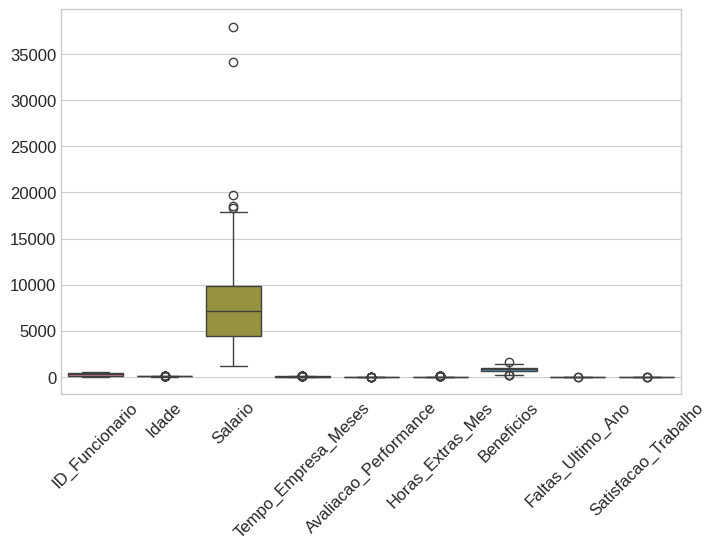

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.show()

In [13]:
outliers_salario.shape[0]

5

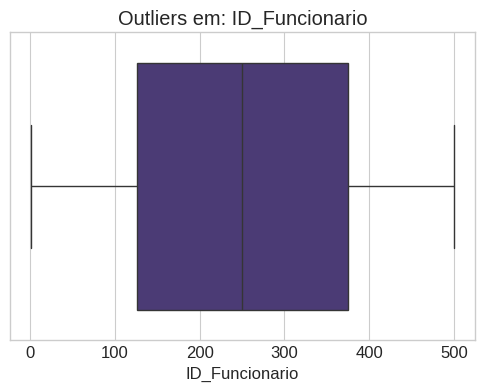

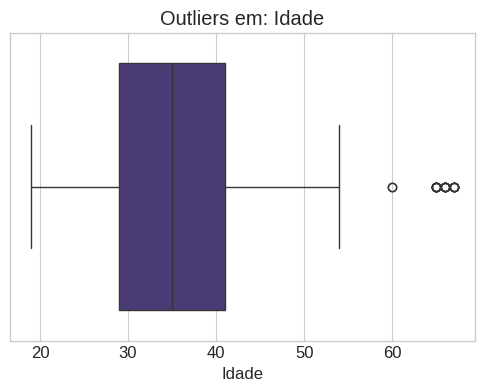

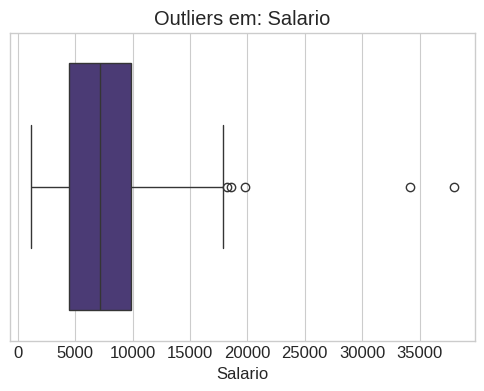

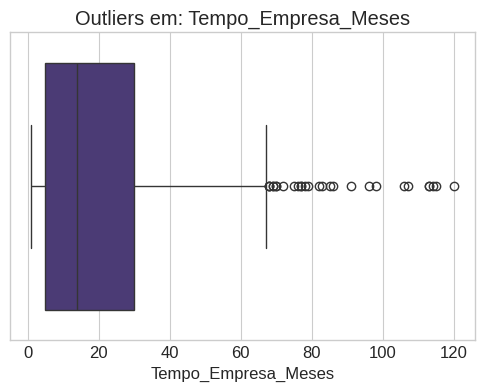

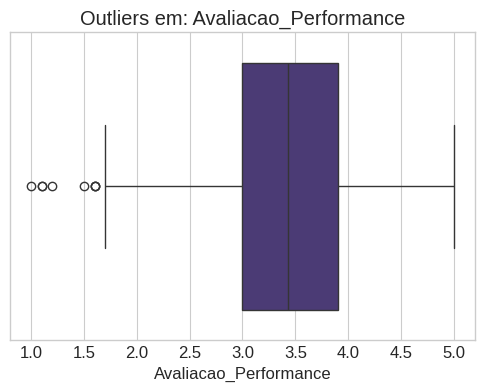

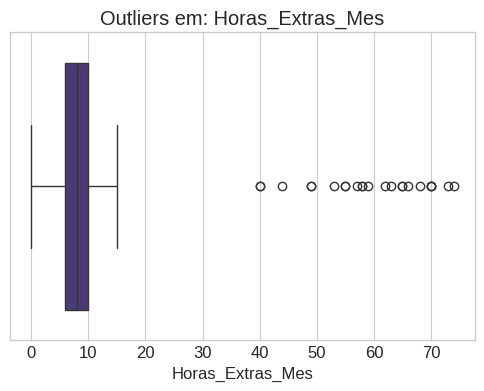

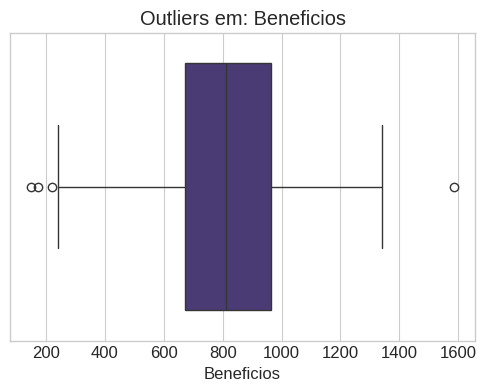

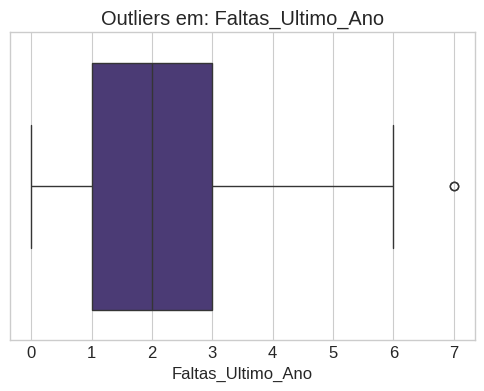

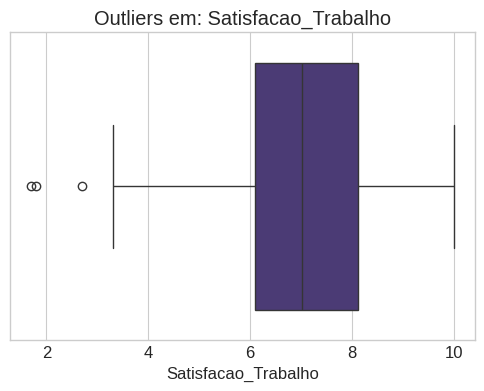

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers em: {col}")
    plt.show()

In [16]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    df = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]